In [1]:
#!pwsh
Push-Location
# build projects
cd ../
dotnet build
Pop-Location

MSBuild version 17.9.6+a4ecab324 for .NET
  Determining projects to restore...
  All projects are up-to-date for restore.
  Anpcp.Core -> C:\Users\netoo\local-personal\repos\alpha-neighbor-p-center-problem\src\Anpcp.Core\bin\Debug\net8.0\Anpcp.Core.dll
C:\Users\netoo\local-personal\repos\alpha-neighbor-p-center-problem\src\Anpcp.Interactive\Pdp\FgdInteractive.cs(31,12): warning CS8618: Non-nullable property 'ClosedFacilitiesQueue' must contain a non-null value when exiting constructor. Consider declaring the property as nullable. [C:\Users\netoo\local-personal\repos\alpha-neighbor-p-center-problem\src\Anpcp.Interactive\Anpcp.Interactive.csproj]
  Anpcp.Interactive -> C:\Users\netoo\local-personal\repos\alpha-neighbor-p-center-problem\src\Anpcp.Interactive\bin\Debug\net8.0\Anpcp.Interactive.dll

Build succeeded.

C:\Users\netoo\local-personal\repos\alpha-neighbor-p-center-problem\src\Anpcp.Interactive\Pdp\FgdInteractive.cs(31,12): warning CS8618: Non-nullable property 'ClosedFacilitiesQ

In [2]:
#!csharp
// add built packages
#r "..\bin\Debug\net8.0\Anpcp.Core.dll"
#r "..\bin\Debug\net8.0\Anpcp.Interactive.dll"
// install plotter package
#r "nuget:ScottPlot, 5.0.39"

Installed Packages ScottPlot, 5.0.39

Loading extensions from `C:\Users\netoo\.nuget\packages\skiasharp\2.88.8\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

In [3]:
// Setup a custom formatter to display plots as images
using ScottPlot;
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(Plot),
    (p, w) => w.Write(
        ((Plot)p).GetImageHtml(600, 450)),
    HtmlFormatter.MimeType);

In [4]:
var seed = 2024101522;

In [5]:
using Anpcp.Core.Instances;

var instance = new InstanceSameSet(10, 200, 150, seed: seed);

min: li
{0: 86, 1: 2147483647, 2: 2147483647, 3: 2147483647, 4: 2147483647, 5: 2147483647, 7: 2147483647, 8: 2147483647, 9: 2147483647}
min: li
{0: 86, 1: 88, 2: 2147483647, 3: 2147483647, 4: 2147483647, 5: 2147483647, 7: 2147483647, 8: 2147483647, 9: 2147483647}
min: li
{0: 86, 1: 88, 2: 100, 3: 2147483647, 4: 2147483647, 5: 2147483647, 7: 2147483647, 8: 2147483647, 9: 2147483647}
min: li
{0: 86, 1: 88, 2: 100, 3: 56, 4: 2147483647, 5: 2147483647, 7: 2147483647, 8: 2147483647, 9: 2147483647}
min: li
{0: 86, 1: 88, 2: 100, 3: 56, 4: 118, 5: 2147483647, 7: 2147483647, 8: 2147483647, 9: 2147483647}
min: li
{0: 86, 1: 88, 2: 100, 3: 56, 4: 118, 5: 90, 7: 2147483647, 8: 2147483647, 9: 2147483647}
min: li
{0: 86, 1: 88, 2: 100, 3: 56, 4: 118, 5: 90, 7: 118, 8: 2147483647, 9: 2147483647}
min: li
{0: 86, 1: 88, 2: 100, 3: 56, 4: 118, 5: 90, 7: 118, 8: 85, 9: 2147483647}
min: li
{0: 86, 1: 88, 2: 100, 3: 56, 4: 118, 5: 90, 7: 118, 8: 85, 9: 179}
{0: 86, 1: 88, 2: 100, 3: 56, 4: 118, 5: 90, 7: 


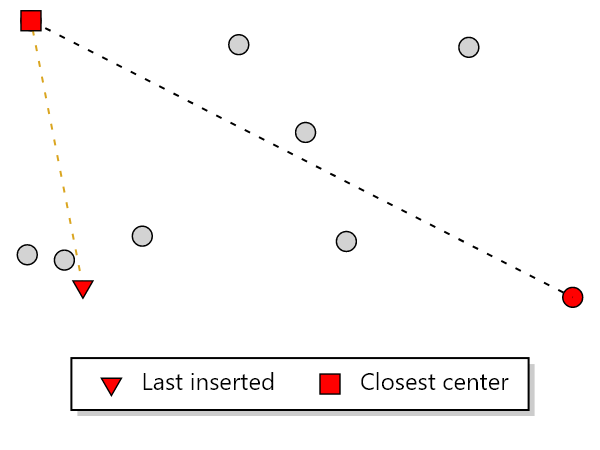

In [6]:
using Anpcp.Interactive.Pdp;

var fgd = new FgdInteractive(5, instance, seed);
// run to have 3 centers
fgd.TryPlotMainIteration()

In [7]:
var li = fgd.DistancesMemory
    .MaxBy(p => p.Value.Distance)
    .Key;

var closestCenter = fgd.DistancesMemory[li];
fgd.Instance.Facilities[closestCenter.Index]


Index,9
XCoord,177
YCoord,16
Type,Both


min: li
{0: 24, 1: 88, 3: 56, 4: 64, 5: 90, 7: 98, 8: 85}



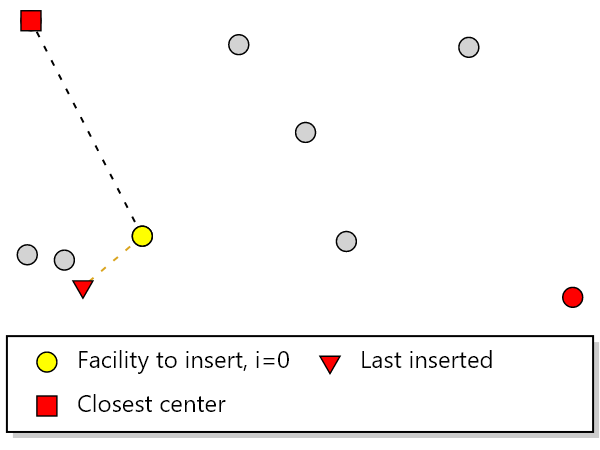

In [8]:
using ColorName = System.Drawing.Color;

fgd.PlotConfig = new() {
};

fgd.TryPlotForMemoryIteration()

In [9]:
fgd.ClosedFacilitiesQueue.Count

6

In [10]:
fgd.ResetClosedFacilitiesQueue()